# Vanishing/Exploding Gradients Problems

### Glorot and He Initialization

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.12.0'

In [3]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
X_valid.shape

(3870, 8)

In [7]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                distribution='uniform')

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", kernel_initializer='he_normal',
                       input_shape=X_train[1].shape),
    keras.layers.Dense(1, activation="relu", kernel_initializer=he_avg_init)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss=keras.losses.mean_squared_error, optimizer = keras.optimizers.SGD())

In [11]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.5739 - val_loss: 0.7429
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6588 - val_loss: 0.4988
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4969 - val_loss: 0.4814
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4673 - val_loss: 0.4404
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4472 - val_loss: 0.4279
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4443 - val_loss: 0.4278
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4337 - val_loss: 0.4997
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4466 - val_loss: 0.4160
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4221 - val_loss: 0.4085
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4115 - val_loss: 0.4032

In [12]:
y_train

array([3.552, 0.634, 1.382, ..., 3.029, 2.167, 0.784])

### Nonsaturating Activation Functions

In [13]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [14]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [15]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
layer = keras.layers.Dense(10, activation=leaky_relu, kernel_initializer='he_normal')

In [16]:
p_relu = keras.layers.PReLU()

In [17]:
selu = keras.layers.Dense(10, activation='selu',
                          kernel_initializer='lecun_normal')

**Using Leaky Relu to train**

In [18]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [19]:

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2856 - accuracy: 0.5973 - val_loss: 0.8662 - val_accuracy: 0.7236
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7828 - accuracy: 0.7441 - val_loss: 0.6970 - val_accuracy: 0.7750
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6718 - accuracy: 0.7788 - val_loss: 0.6307 - val_accuracy: 0.7902
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6139 - accuracy: 0.7971 - val_loss: 0.5785 - val_accuracy: 0.8078
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5768 - accuracy: 0.8082 - val_loss: 0.5481 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5504 - accuracy: 0.8156 - val_loss: 0.5266 - val_accuracy: 0.8274
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5305 - accuracy: 0.8215 - val_loss: 0.5085 - val_accuracy:

**Using PRelu to train**

In [22]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [24]:

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 1.3243 - accuracy: 0.6133 - val_loss: 0.8863 - val_accuracy: 0.7244
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7949 - accuracy: 0.7423 - val_loss: 0.7058 - val_accuracy: 0.7682
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6798 - accuracy: 0.7769 - val_loss: 0.6395 - val_accuracy: 0.7902
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6208 - accuracy: 0.7956 - val_loss: 0.5855 - val_accuracy: 0.8118
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5829 - accuracy: 0.8067 - val_loss: 0.5537 - val_accuracy: 0.8212
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5555 - accuracy: 0.8130 - val_loss: 0.5309 - val_accuracy: 0.8254
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5344 - accuracy: 0.8196 - val_loss: 0.5116 - val_accuracy:

**Using SELU is easy**

In [25]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 46s 20ms/step - loss: 1.3856 - accuracy: 0.4389 - val_loss: 1.1629 - val_accuracy: 0.5092
Epoch 2/5
1719/1719 [==============================] - 33s 19ms/step - loss: 1.0532 - accuracy: 0.5843 - val_loss: 0.7763 - val_accuracy: 0.7220
Epoch 3/5
1719/1719 [==============================] - 34s 20ms/step - loss: 1.2649 - accuracy: 0.4836 - val_loss: 1.0595 - val_accuracy: 0.6052
Epoch 4/5
1719/1719 [==============================] - 31s 18ms/step - loss: 1.1277 - accuracy: 0.5624 - val_loss: 1.9945 - val_accuracy: 0.2312
Epoch 5/5
1719/1719 [==============================] - 34s 20ms/step - loss: 1.7816 - accuracy: 0.3065 - val_loss: 1.6230 - val_accuracy: 0.3876


In [31]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

In [32]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [33]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

In [34]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


### Batch Normallization

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')    
])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_112 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_113 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 5ms/step - loss: 0.8533 - accuracy: 0.7119 - val_loss: 0.5901 - val_accuracy: 0.8012
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5930 - accuracy: 0.7949 - val_loss: 0.5103 - val_accuracy: 0.8266
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5404 - accuracy: 0.8114 - val_loss: 0.4761 - val_accuracy: 0.8346
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5074 - accuracy: 0.8245 - val_loss: 0.4532 - val_accuracy: 0.8434
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4851 - accuracy: 0.8301 - val_loss: 0.4370 - val_accuracy: 0.8476
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4716 - accuracy: 0.8353 - val_loss: 0.4251 - val_accuracy: 0.8518
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4590 - accuracy: 0.8398 - val_loss: 0.4137 - val_accura

In [39]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation='softmax')  
])

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_115 (Dense)           (None, 300)               235200    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_116 (Dense)           (None, 100)              

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9337 - accuracy: 0.6881 - val_loss: 0.6337 - val_accuracy: 0.7964
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6327 - accuracy: 0.7872 - val_loss: 0.5426 - val_accuracy: 0.8234
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5717 - accuracy: 0.8053 - val_loss: 0.5026 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5344 - accuracy: 0.8179 - val_loss: 0.4774 - val_accuracy: 0.8424
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5098 - accuracy: 0.8236 - val_loss: 0.4604 - val_accuracy: 0.8486
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4941 - accuracy: 0.8283 - val_loss: 0.4464 - val_accuracy: 0.8534
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4822 - accuracy: 0.8326 - val_loss: 0.4352 - val_accurac

### Gradient Clipping

In [44]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

### Transfer Learning With Keras

X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).

X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.

In [45]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # 'Sandal' & 'Áo sơ mi'
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))
    

In [46]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [47]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

In [48]:
y_train_A[:10]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4], dtype=uint8)

In [49]:
y_train_B[:10]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0.], dtype=float32)

In [50]:
tf.random.set_seed(42)
np.random.seed(42)

In [51]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu', kernel_initializer='lecun_normal'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [52]:
model_A.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_118 (Dense)           (None, 300)               235500    
                                                                 
 dense_119 (Dense)           (None, 100)               30100     
                                                                 
 dense_120 (Dense)           (None, 50)                5050      
                                                                 
 dense_121 (Dense)           (None, 50)                2550      
                                                                 
 dense_122 (Dense)           (None, 50)                2550      
                                                                 
 dense_123 (Dense)           (None, 8)                

In [53]:
model_A.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=2e-3),
             metrics='accuracy')

In [54]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [55]:
expon_lr = ExponentialLearningRate(factor=1.005)

In [56]:
his = model_A.fit(X_train_A, y_train_A, epochs=1,
                  validation_data=(X_valid_A, y_valid_A), callbacks=[expon_lr])

1375/1375 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.5400 - val_loss: nan - val_accuracy: 0.1139


C:\Users\Admin\AppData\Local\Temp\ipykernel_33468\2250432327.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-1, 1)


(0.0020000000949949026, 1)

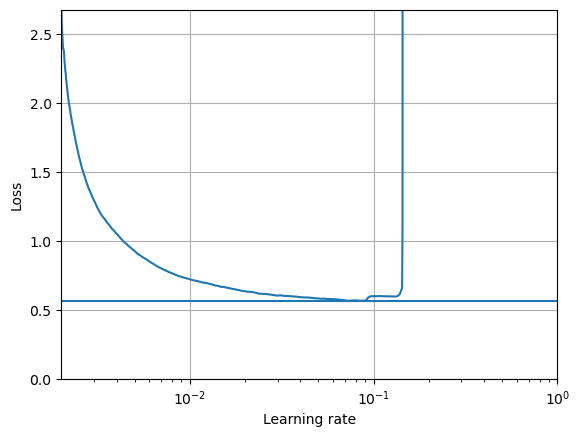

In [57]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.xlim(-1, 1)

In [58]:
EarlyStopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [59]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu', kernel_initializer='lecun_normal'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

model_A.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
             metrics='accuracy')

In [60]:
his = model_A.fit(X_train_A, y_train_A, epochs=100,
                  validation_data=(X_valid_A, y_valid_A), callbacks=[EarlyStopping])

Epoch 1/100
1375/1375 [==============================] - 7s 4ms/step - loss: 0.3650 - accuracy: 0.8717 - val_loss: 0.3020 - val_accuracy: 0.8929
Epoch 2/100
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2699 - accuracy: 0.9070 - val_loss: 0.2602 - val_accuracy: 0.9086
Epoch 3/100
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2484 - accuracy: 0.9123 - val_loss: 0.2438 - val_accuracy: 0.9128
Epoch 4/100
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2337 - accuracy: 0.9184 - val_loss: 0.2476 - val_accuracy: 0.9121
Epoch 5/100
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2217 - accuracy: 0.9222 - val_loss: 0.2472 - val_accuracy: 0.9163
Epoch 6/100
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2140 - accuracy: 0.9242 - val_loss: 0.2328 - val_accuracy: 0.9198
Epoch 7/100
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2063 - accuracy: 0.9280 - val_loss: 0.2496 - val_ac

In [61]:
model_A.save('my_model_A.h5')

In [62]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu',
                                  kernel_initializer='lecun_normal'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [63]:
model_B.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_130 (Dense)           (None, 300)               235500    
                                                                 
 dense_131 (Dense)           (None, 100)               30100     
                                                                 
 dense_132 (Dense)           (None, 50)                5050      
                                                                 
 dense_133 (Dense)           (None, 50)                2550      
                                                                 
 dense_134 (Dense)           (None, 50)                2550      
                                                                 
 dense_135 (Dense)           (None, 1)                

In [64]:
model_B.compile(loss=keras.losses.BinaryCrossentropy(),
                 optimizer=keras.optimizers.SGD(learning_rate=1e-1),
                metrics='accuracy')

In [65]:
X_train_B.shape, y_train_B.shape

((200, 28, 28), (200,))

In [66]:
his = model_B.fit(X_train_B, y_train_B, epochs=20,
                  validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 2s 66ms/step - loss: 2.0424 - accuracy: 0.4850 - val_loss: 0.1457 - val_accuracy: 0.9665
Epoch 2/20
7/7 [==============================] - 0s 24ms/step - loss: 0.0253 - accuracy: 0.9900 - val_loss: 0.1077 - val_accuracy: 0.9777
Epoch 3/20
7/7 [==============================] - 0s 23ms/step - loss: 0.0100 - accuracy: 0.9950 - val_loss: 0.1045 - val_accuracy: 0.9797
Epoch 4/20
7/7 [==============================] - 0s 21ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9828
Epoch 5/20
7/7 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9828
Epoch 6/20
7/7 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9828
Epoch 7/20
7/7 [==============================] - 0s 26ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1049 - val_accuracy: 0.9828
Epoch 8/20
7/7 [===========

In [67]:
model_A = keras.models.load_model('my_model_A.h5')

In [68]:
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

Note that model_B_on_A and model_A actually share layers now, so when we train one, it will update both models. If we want to avoid that, we need to build model_B_on_A on top of a clone of model_A:

In [69]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [70]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [71]:
model_B_on_A.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_124 (Dense)           (None, 300)               235500    
                                                                 
 dense_125 (Dense)           (None, 100)               30100     
                                                                 
 dense_126 (Dense)           (None, 50)                5050      
                                                                 
 dense_127 (Dense)           (None, 50)                2550      
                                                                 
 dense_128 (Dense)           (None, 50)                2550      
                                                                 
 dense_137 (Dense)           (None, 1)               

In [72]:
model_B_on_A.compile(loss=keras.losses.BinaryCrossentropy(),
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics='accuracy')

In [73]:
his = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                 validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 62ms/step - loss: 0.4736 - accuracy: 0.7950 - val_loss: 0.4680 - val_accuracy: 0.7627
Epoch 2/4
7/7 [==============================] - 0s 21ms/step - loss: 0.4487 - accuracy: 0.8100 - val_loss: 0.4471 - val_accuracy: 0.7799
Epoch 3/4
7/7 [==============================] - 0s 20ms/step - loss: 0.4285 - accuracy: 0.8150 - val_loss: 0.4273 - val_accuracy: 0.7911
Epoch 4/4
7/7 [==============================] - 0s 21ms/step - loss: 0.4094 - accuracy: 0.8150 - val_loss: 0.4085 - val_accuracy: 0.8134


In [74]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

In [75]:
model_B_on_A.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_124 (Dense)           (None, 300)               235500    
                                                                 
 dense_125 (Dense)           (None, 100)               30100     
                                                                 
 dense_126 (Dense)           (None, 50)                5050      
                                                                 
 dense_127 (Dense)           (None, 50)                2550      
                                                                 
 dense_128 (Dense)           (None, 50)                2550      
                                                                 
 dense_137 (Dense)           (None, 1)               

In [76]:
model_B_on_A.compile(loss=keras.losses.BinaryCrossentropy(),
                    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                    metrics='accuracy')

In [77]:
his = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                       validation_data=(X_valid_B, y_valid_B),
                       callbacks=[EarlyStopping])

Epoch 1/20
7/7 [==============================] - 1s 63ms/step - loss: 0.3600 - accuracy: 0.8300 - val_loss: 0.3064 - val_accuracy: 0.8661
Epoch 2/20
7/7 [==============================] - 0s 23ms/step - loss: 0.2729 - accuracy: 0.8750 - val_loss: 0.2508 - val_accuracy: 0.9057
Epoch 3/20
7/7 [==============================] - 0s 29ms/step - loss: 0.2222 - accuracy: 0.9000 - val_loss: 0.2083 - val_accuracy: 0.9239
Epoch 4/20
7/7 [==============================] - 0s 27ms/step - loss: 0.1824 - accuracy: 0.9250 - val_loss: 0.1774 - val_accuracy: 0.9391
Epoch 5/20
7/7 [==============================] - 0s 23ms/step - loss: 0.1522 - accuracy: 0.9550 - val_loss: 0.1554 - val_accuracy: 0.9473
Epoch 6/20
7/7 [==============================] - 0s 27ms/step - loss: 0.1305 - accuracy: 0.9650 - val_loss: 0.1397 - val_accuracy: 0.9533
Epoch 7/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1147 - accuracy: 0.9650 - val_loss: 0.1276 - val_accuracy: 0.9564
Epoch 8/20
7/7 [===========

In [78]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 4ms/step - loss: 0.0655 - accuracy: 0.9830


[0.06547557562589645, 0.9829999804496765]

In [79]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9880


[0.05463913455605507, 0.9879999756813049]

### Unsupervised Learning

### Pretraining on an Auxiliary Task

# Faster Optimizers

### Momentum Optimization

In [80]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### Nesterov Accelerated Gradient

In [81]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                 nesterov=True)

### AdaGrad

In [82]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

### RMSProp

In [83]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

### Adam and Nadam Optimization

In [84]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### Learning Rate Scheduling

**Power Scheduling** 

`lr = lr0 / ( 1 + steps / s)**c`

* Keras use `c=1` and `s = 1 / decay`

`=> lr = lr0 / ( 1 + steps * decay)`

In [113]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, weight_decay=1e-4)

In [114]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
]) 

In [115]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=optimizer, metrics='accuracy')

In [116]:
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_valid, y_valid),
         callbacks=[EarlyStopping])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9817 - accuracy: 0.6959 - val_loss: 0.6967 - val_accuracy: 0.7732
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6425 - accuracy: 0.7891 - val_loss: 0.5865 - val_accuracy: 0.8086
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5685 - accuracy: 0.8083 - val_loss: 0.5448 - val_accuracy: 0.8156
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5295 - accuracy: 0.8180 - val_loss: 0.5064 - val_accuracy: 0.8314
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5048 - accuracy: 0.8261 - val_loss: 0.4868 - val_accuracy: 0.8386
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4871 - accuracy: 0.8305 - val_loss: 0.4717 - val_accuracy: 0.8388
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4736 - accuracy: 0.8350 - val_loss: 0.4591 - val_accuracy:

In [119]:
import math
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

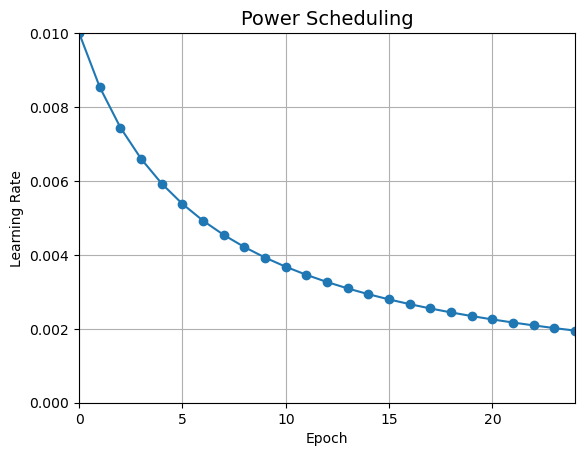

In [120]:
plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

`lr = lr0 * 0.1**(epoch/s)`

In [155]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 **(epoch / 20)

In [156]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=0.01, s =20)

In [157]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [158]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer="nadam", metrics="accuracy")
n_epochs = 25

In [159]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs, 
                    validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6224 - accuracy: 0.7918 - val_loss: 0.6737 - val_accuracy: 0.8120 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8358 - val_loss: 0.4237 - val_accuracy: 0.8564 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4353 - accuracy: 0.8532 - val_loss: 0.5242 - val_accuracy: 0.8174 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4113 - accuracy: 0.8635 - val_loss: 0.3661 - val_accuracy: 0.8742 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3828 - accuracy: 0.8693 - val_loss: 0.3848 - val_accuracy: 0.8738 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3578 - accuracy: 0.8778 - val_loss: 0.3851 - val_accuracy: 0.8774 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 7s

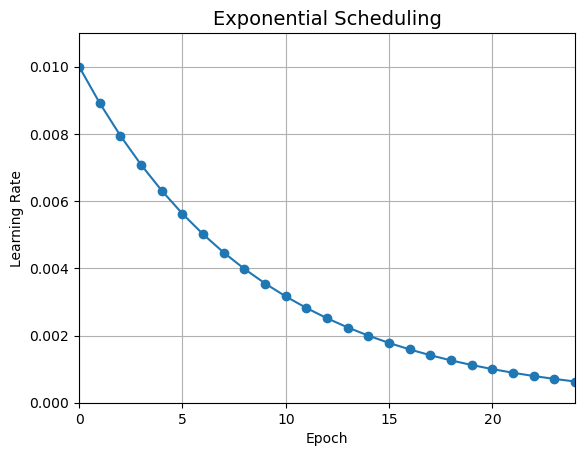

In [166]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [167]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:


In [170]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7153 - accuracy: 0.7864 - val_loss: 0.6242 - val_accuracy: 0.7978 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6228 - accuracy: 0.8099 - val_loss: 0.5060 - val_accuracy: 0.8324 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 9s 6ms/step - loss: 0.6125 - accuracy: 0.8130 - val_loss: 0.5763 - val_accuracy: 0.8360 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5241 - accuracy: 0.8361 - val_loss: 0.4812 - val_accuracy: 0.8542 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5074 - accuracy: 0.8467 - val_loss: 0.4940 - val_accuracy: 0.8584 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4571 - accuracy: 0.8578 - val_loss: 0.4815 - val_accuracy: 0.8518 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 9

In [153]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

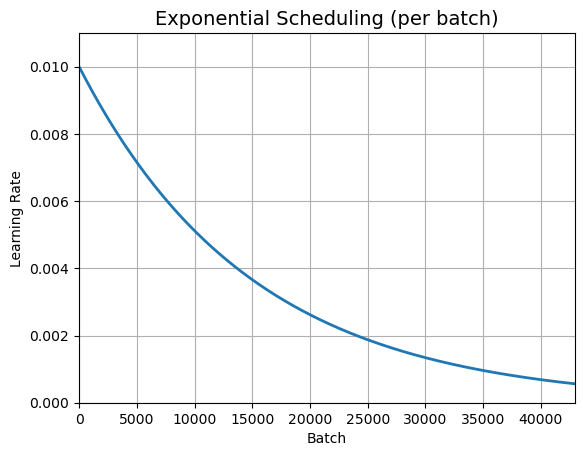

In [154]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [175]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    if epoch < 15:
        return 0.005
    else:
        return 0.001

In [176]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def picewise_constant_fn(epoch):
        return value[np.argmax(boundaries > epoch) - 1 ]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [185]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics='accuracy')

In [186]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7370 - accuracy: 0.7807 - val_loss: 0.6935 - val_accuracy: 0.8116 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8760 - accuracy: 0.7428 - val_loss: 0.8693 - val_accuracy: 0.7532 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8806 - accuracy: 0.7293 - val_loss: 1.2024 - val_accuracy: 0.5874 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9955 - accuracy: 0.6712 - val_loss: 1.0944 - val_accuracy: 0.5648 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0708 - accuracy: 0.6334 - val_loss: 1.1607 - val_accuracy: 0.6194 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7037 - accuracy: 0.7651 - val_loss: 0.6945 - val_accuracy: 0.7990 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8s

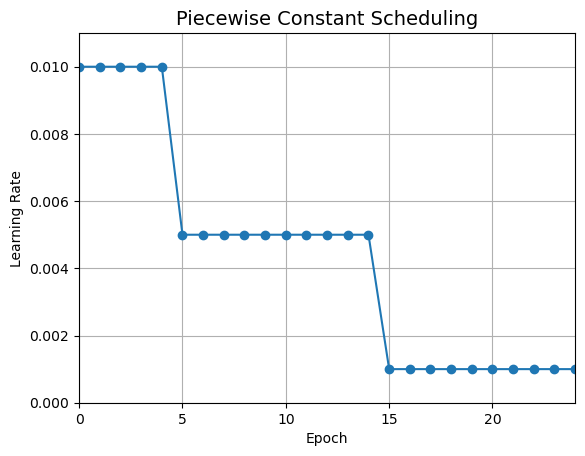

In [187]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Perfomance Scheduling

In [194]:
tf.random.set_seed(42)
np.random.seed(42)

In [195]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [196]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
             metrics='accuracy')
n_epochs=25

In [197]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, 
         validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5959 - accuracy: 0.8043 - val_loss: 0.4706 - val_accuracy: 0.8496 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4925 - accuracy: 0.8416 - val_loss: 0.5551 - val_accuracy: 0.8392 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5155 - accuracy: 0.8414 - val_loss: 0.5320 - val_accuracy: 0.8518 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5390 - accuracy: 0.8426 - val_loss: 0.4914 - val_accuracy: 0.8596 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5204 - accuracy: 0.8495 - val_loss: 0.4904 - val_accuracy: 0.8464 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4938 - accuracy: 0.8555 - val_loss: 0.7319 - val_accuracy: 0.8392 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 7s

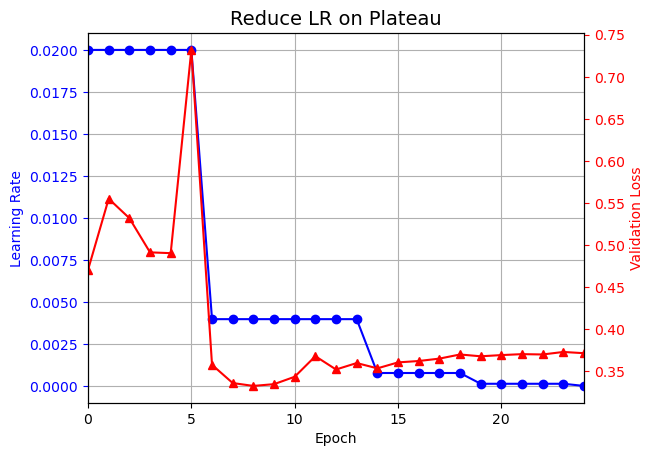

In [200]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras.schedulers

In [201]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch_size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, 
             metrics='accuracy')

In [203]:
n_epochs = 25
model.fit(X_train_scaled, y_train, epochs=n_epochs, 
         validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3772 - accuracy: 0.8663 - val_loss: 0.3777 - val_accuracy: 0.8686
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3444 - accuracy: 0.8775 - val_loss: 0.3649 - val_accuracy: 0.8762
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3231 - accuracy: 0.8847 - val_loss: 0.3675 - val_accuracy: 0.8760
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3073 - accuracy: 0.8903 - val_loss: 0.3480 - val_accuracy: 0.8794
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.8949 - val_loss: 0.3441 - val_accuracy: 0.8798
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2837 - accuracy: 0.8988 - val_loss: 0.3448 - val_accuracy: 0.8826
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.9014 - val_loss: 0.3415 - val_accuracy:

In [205]:
# For piecewise constant scheduling, try this: 

learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], 
values=[0.01, 0.005, 0.001])

# Avoiding Overfitting Through Regularization

In [207]:
layer = keras.layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively


In [209]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense, activation='elu', 
                                             kernel_initializer='he_normal',
                                             kernel_regularizer=keras.regularizers.l2(0.01))

In [219]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax', kernel_initializer='glorot_uniform')
])

In [220]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
             metrics='accuracy')

In [221]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, 
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6274 - accuracy: 0.8132 - val_loss: 0.7043 - val_accuracy: 0.8402
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7216 - accuracy: 0.8275 - val_loss: 0.6920 - val_accuracy: 0.8360
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7043 - accuracy: 0.8313 - val_loss: 0.6853 - val_accuracy: 0.8432
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6965 - accuracy: 0.8366 - val_loss: 0.6730 - val_accuracy: 0.8478
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6916 - accuracy: 0.8372 - val_loss: 0.6649 - val_accuracy: 0.8482
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6891 - accuracy: 0.8373 - val_loss: 0.6623 - val_accuracy: 0.8512
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6867 - accuracy: 0.8385 - val_loss: 0.6596 - val_accuracy:

### Dropout

In [223]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [225]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
             metrics='accuracy')

In [227]:
n_epochs=25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 11s 5ms/step - loss: 0.5668 - accuracy: 0.8047 - val_loss: 0.3713 - val_accuracy: 0.8672
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4272 - accuracy: 0.8425 - val_loss: 0.3407 - val_accuracy: 0.8746
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3940 - accuracy: 0.8544 - val_loss: 0.3437 - val_accuracy: 0.8754
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3750 - accuracy: 0.8618 - val_loss: 0.3249 - val_accuracy: 0.8828
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3605 - accuracy: 0.8659 - val_loss: 0.3252 - val_accuracy: 0.8848
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3493 - accuracy: 0.8691 - val_loss: 0.3250 - val_accuracy: 0.8834
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3456 - accuracy: 0.8719 - val_loss: 0.3359 - val_accuracy

### Alpha Dropout

In [230]:
tf.random.set_seed(42)
np.random.seed(42)

In [231]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [232]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7135 - accuracy: 0.7384 - val_loss: 0.5925 - val_accuracy: 0.8406
Epoch 2/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5736 - accuracy: 0.7873 - val_loss: 0.5583 - val_accuracy: 0.8476
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5409 - accuracy: 0.8000 - val_loss: 0.5605 - val_accuracy: 0.8486
Epoch 4/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5199 - accuracy: 0.8073 - val_loss: 0.5077 - val_accuracy: 0.8612
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5062 - accuracy: 0.8112 - val_loss: 0.4624 - val_accuracy: 0.8680
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4970 - accuracy: 0.8157 - val_loss: 0.4909 - val_accuracy: 0.8598
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4851 - accuracy: 0.8173 - val_loss: 0.4846 - val_accuracy:

In [233]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5055 - accuracy: 0.8590


[0.5054994821548462, 0.859000027179718]

In [234]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3950 - accuracy: 0.8783


[0.39499345421791077, 0.8783090710639954]

### Monte-Carlo (MC) Dropout

In [248]:
tf.random.set_seed(42)
np.random.seed(42)

In [249]:
y_probas = np.stack([model(X_test_scaled, training=True) # Bật chế độ huấn luyện để các tham số có thể được cập nhật
                    for sample in range(100)])

In [250]:
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [251]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 40ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [252]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.1 , 0.  , 0.82]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.38, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.29, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.09, 0.  , 0.64]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.13, 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.39, 0.  , 0.02, 0.  , 0.58]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.05, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.07, 0.  , 0

In [253]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.18, 0.  , 0.71]],
      dtype=float32)

In [260]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.21, 0.  , 0.26]],
      dtype=float32)

In [262]:
y_pred = np.argmax(y_proba, axis=1)

In [265]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8576

In [266]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5055 - accuracy: 0.8590


[0.5054994821548462, 0.859000027179718]

In [267]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(input, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [268]:
tf.random.set_seed(42)
np.random.seed(42)

In [270]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer # isinstance kiểm tra xem đối tượng có thuộc một lớp cụ thể hay không
    for layer in model.layers 
])

In [272]:
mc_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout_3 (MCAlpha  (None, 784)              0         
 Dropout)                                                        
                                                                 
 dense_196 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_4 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_197 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_5 (MCAlpha  (None, 100)            

In [273]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics='accuracy')

In [275]:
mc_model.set_weights(model.get_weights())

In [276]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)


1/1 [==============================] - 0s 26ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.19, 0.  , 0.72]],
      dtype=float32)

### Max-Norm Regularixation

In [277]:
layer = keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal',
                          kernel_constraint=keras.constraints.max_norm(1.))

In [279]:
MaxNormDense = partial(keras.layers.Dense, activation='selu',
                      kernel_initializer='lecun_normal',
                      kernel_constraint=keras.constraints.max_norm(1.))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation='softmax')
])

In [280]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
             metrics='accuracy')

In [281]:
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 5ms/step - loss: 0.4764 - accuracy: 0.8337 - val_loss: 0.3676 - val_accuracy: 0.8704
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3573 - accuracy: 0.8698 - val_loss: 0.3955 - val_accuracy: 0.8624


# Summary and Pratical Guidelines